In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
import seaborn as sns
from scipy import stats
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
# read in the entire dataset
master = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

master = master[(master['EffMeas'] == 'LR') & (master['TotalApp'] == 1)]

In [4]:
cd1 = master[(master['AppMethod'] == 'liquid immersion') & (master['UndergroundCeilings'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd2 = master[(master['AppMethod'] == 'liquid immersion') & (master['OutdoorMisc'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd3 = master[(master['AppMethod'] == 'foam spray') & (master['Pavement'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd4 = master[(master['AppMethod'] == 'foam spray') & (master['Roofing'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd5 = master[(master['AppMethod'] == 'foam spray') & (master['OutdoorExterior'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd6 = master[(master['AppMethod'] == 'liquid immersion') & (master['IndoorMisc'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd7 = master[(master['AppMethod'] == 'liquid immersion') & (master['IndoorCeilings'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd8 = master[(master['AppMethod'] == 'foam spray') & (master['IndoorExterior'] == 1) & (master['LoadingUn'] == 'CFU/cm^2')]
cd9 = master[(master['AppMethod'] == 'foam spray') & (master['ConcDoseUn'] == 'g/mL')]
cd10 = master[(master['AppMethod'] == 'liquid immersion') & (master['IndoorMisc'] == 1) & (master['ConcDoseUn'] == 'g/mL')]
cd11 = master[(master['AppMethod'] == 'fumigation') & (master['HVAC'] == 1) & (master['ConcDoseUn'] == 'g/mL')]
cd12 = master[(master['AppMethod'] == 'fumigation') & (master['UndergroundNonCarpet'] == 1)]
cd13 = master[(master['AppMethod'] == 'fumigation') & (master['Roofing'] == 1)]
cd14 = master[(master['AppMethod'] == 'fumigation') & (master['HVAC'] == 1)]
cd15 = master[(master['AppMethod'] == 'fumigation') & (master['IndoorNonCarpet'] == 1)]
cd16 = master[(master['OutdoorMisc'] == 1) & (master['VolAppUn'] == 'g/cm^2')]
cd17 = master[(master['IndoorMisc'] == 1) & (master['VolAppUn'] == 'g/cm^2')]
cd18 = master[(master['AppMethod'] == 'foam spray') & (master['Pavement'] == 0) & (master['Roofing'] == 0) & (master['OutdoorExterior'] == 0) & (master['HVAC'] == 0) & (master['IndoorExterior'] == 0)]
cd19 = master[(master['AppMethod'] == 'liquid suspension')]
cd20 = master[(master['AppMethod'] == 'liquid immersion') & (master['UndergroundCarpet'] == 1)]
cd21 = master[(master['AppMethod'] == 'foam spray') & (master['Pavement'] == 1)]
cd22 = master[(master['AppMethod'] == 'foam spray') & (master['Roofing'] == 1)]
cd23 = master[(master['AppMethod'] == 'foam spray') & (master['HVAC'] == 1)]
cd24 = master[(master['AppMethod'] == 'foam spray') & (master['OutdoorExterior'] == 1)]
cd25 = master[(master['AppMethod'] == 'liquid immersion') & (master['IndoorCarpet'] == 1)]
cd26 = master[(master['AppMethod'] == 'foam spray') & (master['IndoorExterior'] == 1)]
cd27 = master[(master['AppMethod'] == 'foam spray') & (master['OutdoorExterior'] == 1)]
cd28 = master[(master['AppMethod'] == 'foam spray') & (master['IndoorExterior'] == 1)]
cd29 = master[(master['AppMethod'] == 'liquid wipe')]
cd30 = master[(master['AppMethod'] == 'liquid immersion') & (master['UndergroundCeilings'] == 1)]
cd31 = master[(master['AppMethod'] == 'physical') & (master['IndoorMisc'] == 1)]
cd32 = master[(master['AppMethod'] == 'liquid immersion') & (master['IndoorCeilings'] == 1)]

In [115]:
para = [
    (cd11, 'ConcDose'),
    (cd18, 'Temp'),
    (cd19, 'Temp'),
    (cd31, 'ContTime'),
    (cd24, 'Temp')
]

{0.0008: 5.8016304347826, 8e-05: 7.23, 0.007: 3.45, 0.009: 7.47, 0.0098: 7.65, 0.012: 6.42, 0.000365: 8.2, 0.003: 7.84, 0.0003: 8.03, 0.00015: 7.86, 0.00025: 7.8, 0.000211: 6.8, 0.009001: 3.03, 0.009022: 2.83, 0.009035: 2.14, 0.009046: 3.95, 0.009002: 4.51, 0.009007: 1.59, 0.009059: 2.47, 0.009025: 3.05, 0.008995: 2.73, 0.00905: 2.59, 0.00898: 4.09999999999999, 0.0006: 7.83, 0.0001: 7.6983, 0.0002: 7.81, 0.001585: 6.54, 0.002185: 6.46, 0.00075: 7.63636363636362, 0.000212: 7.61, 0.0005: 8.22, 0.000225: 6.72}
{0.0008: 4.67934782608694, 8e-05: 6.37, 0.007: 0.44, 0.009: 1.23, 0.0098: 2.58, 0.012: 4.69, 0.000365: 7.7, 0.003: 6.25, 0.0003: 0.64, 0.00015: 2.6, 0.00025: 7.0, 0.000211: 0.2, 0.009001: 0.82, 0.009022: 2.04999999999999, 0.009035: 1.75, 0.009046: 1.98, 0.009002: 4.51, 0.009007: 1.4, 0.009059: 1.73, 0.009025: 1.65, 0.008995: 2.16, 0.00905: 1.68, 0.00898: 3.13, 0.0006: 3.16, 0.0001: 1.72, 0.0002: 4.09999999999999, 0.001585: 6.04, 0.002185: 6.39, 0.00075: -0.0519480519480515, 0.000212

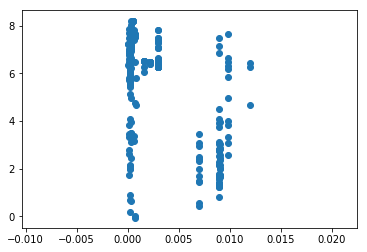

{27.0: 9.1, 23.0: 5.84398169184223, -20.0: 0.869565217391303, 4.0: 3.25217391304347, 22.5: 7.62, 22.0: 7.8}
{27.0: 9.1, 23.0: 0.556521739130434, -20.0: 0.243702414859307, 4.0: 0.0468564715791338, 22.5: 4.82, 22.0: 7.59}


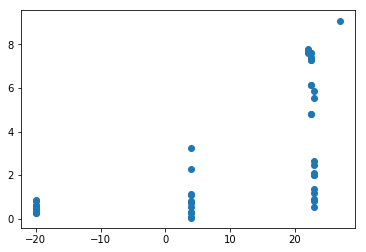

{20.0: 7.54, 25.0: 8.0, 23.0: 5.48, 10.0: 8.2873900293255, 33.0: 3.06040200294967, 5.0: 2.22, 22.0: 8.69999999999999, 55.0: 8.524926686217, 80.0: 6.0, 15.0: 5.42301270417422, 21.0: 6.0, 50.0: 5.0, 60.0: 7.66029723991507, 70.0: 5.0, 37.0: 7.42470313999725, 72.0: 6.0, 85.0: 6.0, -5.0: 8.23460410557184, 21.3: 7.6}
{20.0: -0.14, 25.0: -0.160958904109588, 23.0: -0.12, 10.0: -0.0556122692362731, 33.0: -0.0059258343415785, 5.0: 0.43, 22.0: 0.0, 55.0: 0.0, 80.0: 0.07, 15.0: 0.0147368421052637, 21.0: 0.1, 50.0: 0.0, 60.0: -0.0112449799196774, 70.0: 1.97938144329896, 37.0: -0.00360894007952872, 72.0: 6.0, 85.0: 6.0, -5.0: 0.0791788856304986, 21.3: 6.7}


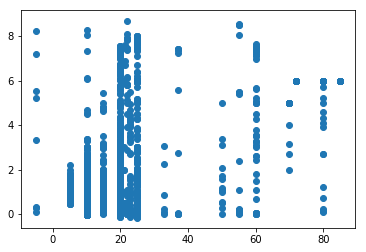

{15.0: 2.7, 3.806054105711617: 1.87062937062937, 6.430570000775466: 2.62587412587412, 11.97418449130773: 2.78321678321677, 0.472486987897945: 0.465034965034966, 1.897859560530783: 0.695804195804195, 3.242405425624583: 0.821678321678322, 6.463071745605983: 0.842657342657343, 8.989298372859999: 1.06293706293706, 1.428579981662165: 0.758741258741258, 2.365285969738017: 0.905594405594405, 2.854807863369483: 0.863636363636363, 3.832568687020733: 0.968531468531468, 6.460648369894933: 1.1993006993007, 8.984309069925482: 1.79720279720279, 11.96007189157868: 1.86013986013986}
{15.0: 1.5, 3.806054105711617: 1.87062937062937, 6.430570000775466: 2.62587412587412, 11.97418449130773: 2.78321678321677, 0.472486987897945: 0.465034965034966, 1.897859560530783: 0.695804195804195, 3.242405425624583: 0.821678321678322, 6.463071745605983: 0.842657342657343, 8.989298372859999: 1.06293706293706, 1.428579981662165: 0.758741258741258, 2.365285969738017: 0.905594405594405, 2.854807863369483: 0.863636363636363, 

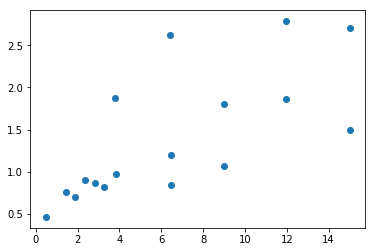

{27.0: 9.19999999999999, 22.5: 7.85, 22.0: 7.74}
{27.0: 9.0, 22.5: 7.05, 22.0: 7.74}


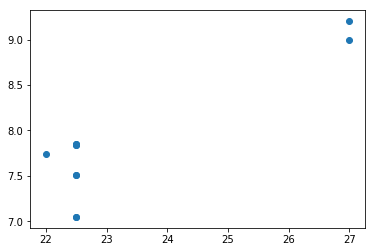

In [116]:
def uniformXDistributions(data, parameter):
    temp = pd.DataFrame()
    temp['X'] = data[parameter]
    temp['Y'] = data.Eff
    
    temp = temp.dropna(0)
    
    plt.scatter(temp.X, temp.Y)
    #plt.xlabel(xLabel)
    #plt.ylabel('Efficacy (LR)')
    #plt.title(title)
    
    topPoints = dict()
    bottomPoints = dict()
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    
    for i in temp.itertuples():
        if i[1] in topPoints:
            topPoints[i[1]] = max(topPoints[i[1]], i[2])
        else:
            topPoints.update({i[1] : i[2]})
            
        if i[1] in bottomPoints:
            bottomPoints[i[1]] = min(bottomPoints[i[1]], i[2])
        else:
            bottomPoints.update({i[1] : i[2]})
    
    print(topPoints)
    print(bottomPoints)
    
    xI = 0
    
    x1.append(list(topPoints.keys())[0])
    y1.append(list(topPoints.values())[0])
    
    x2.append(list(bottomPoints.keys())[0])
    y2.append(list(bottomPoints.values())[0])
    
    if max(topPoints.values()) > y1[0]:
        directionT = 'increasing'
    else:
        directionT = 'decreasing'
    
    if directionT == 'increasing':
        for key in topPoints:
            if topPoints[key] > y1[xI] and key != x1[xI]:
                x1.append(key)
                y1.append(topPoints[key])
                
        size = len(x1) - 1
        
        if topPoints[max(list(topPoints.keys()))] < y1[size]:
            x1.append(max(list(topPoints.keys())))
            y1.append(y1[size])
            
    elif directionT == 'decreasing':
        for key in topPoints:
            if topPoints[key] < x1[xI]:
                x1.append(key)
                y1.append(topPoints[key])

    #plt.fill(a, color='skyblue', alpha=0.5)
    
    plt.show()
    
for p in para:
    uniformXDistributions(*p)

8


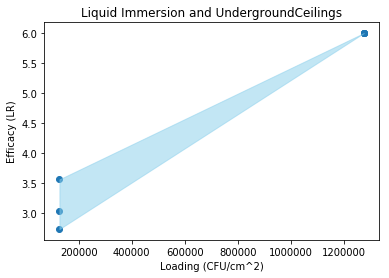

In [6]:
print(min(cd1.Loading.count(), cd1.Eff.count()))

x_data = cd1.Loading
y_data = cd1.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and UndergroundCeilings')

x = [1273885.350318471, 127388.5350318471]
y1 = [6.0, 3.56]
y2 = [6.0, 2.73]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [143]:
line1=[(1273885.350318471, 6),(127388.5350318471, 3.46)]
line2=[(1273885.350318471, 6),(127388.5350318471, 2.73)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = 2.2e-06x + 3.1778
3.177777777777778
line 2: y = 2.9e-06x + 2.3667
2.366666666666667
line 1: [(1273885.350318471, 6), (127388.5350318471, 3.46)]
line 2: [(1273885.350318471, 6), (127388.5350318471, 2.73)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


62


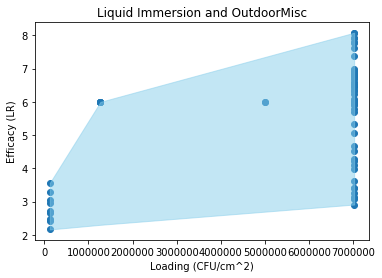

In [8]:
print(min(cd2.Loading.count(), cd2.Eff.count()))

x_data = cd2.Loading
y_data = cd2.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and OutdoorMisc')

x = [127388.5350318471, 1273885.350318471, 7017543.859649123]
y1 = [3.56, 6, 8.08]
y2 = [2.16, 2.30, 2.91]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [145]:
line1=[(127388.5350318471, 3.56),(1273885.350318471, 6)]
line2=[(1273885.350318471, 6),(7017543.859649123, 8.08)]

line3=[(127388.5350318471, 2.16),(7017543.859649123, 2.91)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 2.1e-06x + 3.2889
3.2888888888888883
line 2: y = 4e-07x + 5.5387
5.538677042801557
line 3: y = 1e-07x + 2.1461
2.146133636068765
line 1: [(127388.5350318471, 3.56), (1273885.350318471, 6)]
line 2: [(1273885.350318471, 6), (7017543.859649123, 8.08)]
line 3: [(127388.5350318471, 2.16), (7017543.859649123, 2.91)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

5


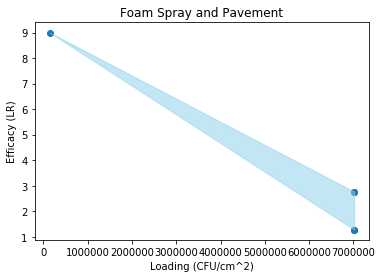

In [9]:
print(min(cd3.Loading.count(), cd3.Eff.count()))

x_data = cd3.Loading
y_data = cd3.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and Pavement')

x = [145833.3333333333, 7017543.859649123]
y1 = [9, 2.77]
y2 = [9, 1.28]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [147]:
line1=[(145833.3333333333, 9),(7017543.859649123, 2.77)]

line2=[(145833.3333333333, 9),(7017543.859649123, 1.28)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = -9e-07x + 9.1322
9.1322147758098
line 2: y = -1.1e-06x + 9.1638
9.163835966172016
line 1: [(145833.3333333333, 9), (7017543.859649123, 2.77)]
line 2: [(145833.3333333333, 9), (7017543.859649123, 1.28)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


5


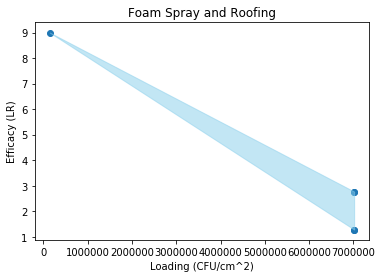

In [10]:
print(min(cd4.Loading.count(), cd4.Eff.count()))

x_data = cd4.Loading
y_data = cd4.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and Roofing')

x = [145833.3333333333, 7017543.859649123]
y1 = [9, 2.77]
y2 = [9, 1.28]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [149]:
line1=[(145833.3333333333, 9),(7017543.859649123, 2.77)]

line2=[(145833.3333333333, 9),(7017543.859649123, 1.28)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = -9e-07x + 9.1322
9.1322147758098
line 2: y = -1.1e-06x + 9.1638
9.163835966172016
line 1: [(145833.3333333333, 9), (7017543.859649123, 2.77)]
line 2: [(145833.3333333333, 9), (7017543.859649123, 1.28)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


11


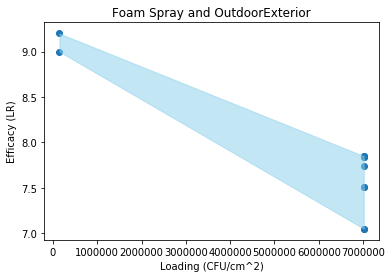

In [11]:
print(min(cd5.Loading.count(), cd5.Eff.count()))

x_data = cd5.Loading
y_data = cd5.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and OutdoorExterior')

x = [145833.3333333333, 7017543.859649123]
y1 = [9.19999999999999, 7.85]
y2 = [9, 7.05]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [151]:
line1=[(145833.3333333333, 9.19999999999999),(7017543.859649123, 7.85)]

line2=[(145833.3333333333, 9),(7017543.859649123, 7.05)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = -2e-07x + 9.2287
9.228650071804685
line 2: y = -3e-07x + 9.0414
9.041383437051225
line 1: [(145833.3333333333, 9.19999999999999), (7017543.859649123, 7.85)]
line 2: [(145833.3333333333, 9), (7017543.859649123, 7.05)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


30


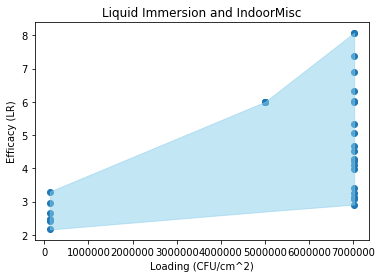

In [12]:
print(min(cd6.Loading.count(), cd6.Eff.count()))

x_data = cd6.Loading
y_data = cd6.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and IndoorMisc')

x = [127388.5350318471, 5000000.0, 7017543.859649123]
y1 = [3.3, 6, 8.08]
y2 = [2.16, 2.7, 2.91]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [153]:
line1=[(127388.5350318471, 3.3),(5000000.0, 6)]
line2=[(5000000.0, 6),(7017543.859649123, 8.08)]

line3=[(127388.5350318471, 2.16),(7017543.859649123, 2.91)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 6),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 6),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 1e-06x + 3.2294
3.2294117647058824
line 2: y = 1e-06x + 0.8452
0.8452173913043386
line 3: y = 1e-07x + 2.1461
2.146133636068765
line 1: [(127388.5350318471, 3.3), (5000000.0, 6)]
line 2: [(5000000.0, 6), (7017543.859649123, 8.08)]
line 3: [(127388.5350318471, 2.16), (7017543.859649123, 2.91)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

8


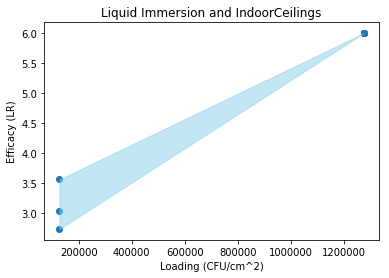

In [13]:
print(min(cd7.Loading.count(), cd7.Eff.count()))

x_data = cd7.Loading
y_data = cd7.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and IndoorCeilings')

x = [127388.5350318471, 1273885.350318471]
y1 = [3.56, 6]
y2 = [2.73, 6]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [155]:
line1=[(127388.5350318471, 3.56),(1273885.350318471, 6)]

line2=[(127388.5350318471, 2.73),(1273885.350318471, 6)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = 2.1e-06x + 3.2889
3.2888888888888883
line 2: y = 2.9e-06x + 2.3667
2.366666666666667
line 1: [(127388.5350318471, 3.56), (1273885.350318471, 6)]
line 2: [(127388.5350318471, 2.73), (1273885.350318471, 6)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


11


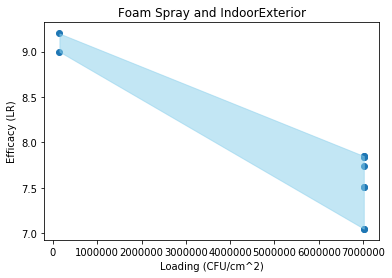

In [14]:
print(min(cd8.Loading.count(), cd8.Eff.count()))

x_data = cd8.Loading
y_data = cd8.Eff

plt.scatter(x_data, y_data)
plt.xlabel('Loading (CFU/cm^2)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and IndoorExterior')

x = [145833.3333333333, 7017543.859649123]
y1 = [9.19999999999999, 7.85]
y2 = [9.0, 7.05]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [157]:
line1=[(145833.3333333333, 9.19999999999999),(7017543.859649123, 7.85)]

line2=[(145833.3333333333, 9.0),(7017543.859649123, 7.05)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 7),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = -2e-07x + 9.2287
9.228650071804685
line 2: y = -3e-07x + 9.0414
9.041383437051225
line 1: [(145833.3333333333, 9.19999999999999), (7017543.859649123, 7.85)]
line 2: [(145833.3333333333, 9.0), (7017543.859649123, 7.05)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


55


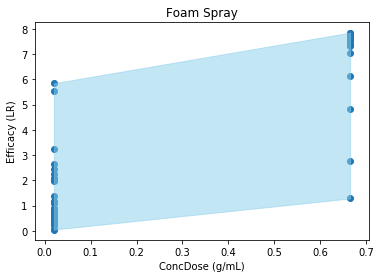

In [15]:
print(min(cd9.ConcDose.count(), cd9.Eff.count()))

x_data = cd9.ConcDose
y_data = cd9.Eff

plt.scatter(x_data, y_data)
plt.xlabel('ConcDose (g/mL)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray')

x = [0.02, 0.665]
y1 = [5.84398169184223, 7.85]
y2 = [0.0468564715791338, 1.28]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [159]:
line1=[(0.02, 5.84398169184223),(0.665, 7.85)]

line2=[(0.02, 0.0468564715791338),(0.665, 1.28)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = 3.1101x + 5.7818
5.781779573759818
line 2: y = 1.9119x + 0.0086
0.008619462945928658
line 1: [(0.02, 5.84398169184223), (0.665, 7.85)]
line 2: [(0.02, 0.0468564715791338), (0.665, 1.28)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


30


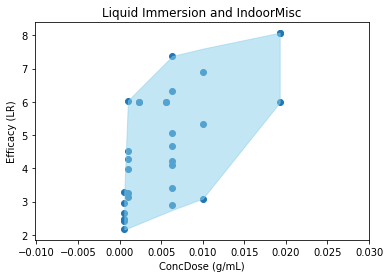

In [93]:
print(min(cd10.ConcDose.count(), cd10.Eff.count()))

x_data = cd10.ConcDose
y_data = cd10.Eff

plt.scatter(x_data, y_data)
plt.xlabel('ConcDose (g/mL)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and IndoorMisc')

x = [0.00056, 0.001, 0.00635, 0.01, 0.01925]
y1 = [3.3, 6.04, 7.38, 7.6, 8.08]
y2 = [2.16, 2.2, 2.75, 3.09, 5.98]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [161]:
line1=[(0.00056, 3.3),(0.001, 6.04)]
line2=[(0.001, 6.04),(0.00635, 7.38)]
line3=[(0.00635, 7.38),(0.01925, 8.08)]

line4=[(0.00056, 2.16),(0.01, 3.09)]
line5=[(0.01, 3.09),(0.01925, 5.98)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line5)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 5: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))
print("line 5: {points}".format(points=line5))

line 1: y = 6227.2727x + -0.1873
-0.18727272727272207
line 2: y = 250.4673x + 5.7895
5.789532710280377
line 3: y = 54.2636x + 7.0354
7.0354263565891495
line 4: y = 98.5169x + 2.1048
2.104830508474576
line 5: y = 312.4324x + -0.0343
-0.03432432432432428
line 1: [(0.00056, 3.3), (0.001, 6.04)]
line 2: [(0.001, 6.04), (0.00635, 7.38)]
line 3: [(0.00635, 7.38), (0.01925, 8.08)]
line 4: [(0.00056, 2.16), (0.01, 3.09)]
line 5: [(0.01, 3.09), (0.01925, 5.98)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine p

270


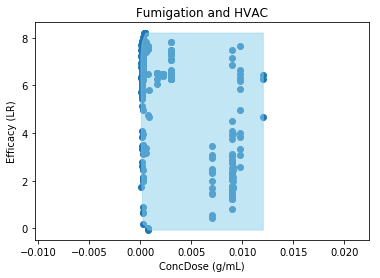

In [98]:
print(min(cd11.ConcDose.count(), cd11.Eff.count()))

x_data = cd11.ConcDose
y_data = cd11.Eff

#plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(x_data, y_data)
plt.xlabel('ConcDose (g/mL)')
plt.ylabel('Efficacy (LR)')
plt.title('Fumigation and HVAC')

x = [0.000008, 0.0001, 0.00015, 0.000211, 0.0003, 0.0005, 0.00075, 0.012]
y1 = [7.23, 7.6983, 7.86, 7.9, 8.03, 8.22, 8.22, 8.22]
y2 = [6.37, 1.72, 1.34, 0.2, 0.18, 0.1, -0.0519480519480515, -0.0519480519480515]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [163]:
line1=[(0.000008, 7.23),(0.0001, 7.6983)]
line2=[(0.0001, 7.6983),(0.00015, 7.86)]
line3=[(0.00015, 7.86),(0.000211, 7.9)]
line4=[(0.000211, 7.9),(0.0003, 8.03)]
line5=[(0.0003, 8.03),(0.0005, 8.22)]
line6=[(0.0005, 8.22),(0.012, 8.22)]

line7=[(0.000008, 6.37),(0.0001, 1.72)]
line8=[(0.0001, 1.72),(0.00015, 1.34)]
line9=[(0.00015, 1.34),(0.000211, 0.2)]
line10=[(0.000211, 0.2),(0.00075, -0.0519480519480515)]
line11=[(0.00075, -0.0519480519480515),(0.012, -0.0519480519480515)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line5)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 5: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line6)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 6: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line7)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 7: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line8)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 8: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line9)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 9: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line10)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 10: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line11)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 11: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))
print("line 5: {points}".format(points=line5))
print("line 6: {points}".format(points=line6))
print("line 7: {points}".format(points=line7))
print("line 8: {points}".format(points=line8))
print("line 9: {points}".format(points=line9))
print("line 10: {points}".format(points=line10))
print("line 11: {points}".format(points=line11))

line 1: y = 5090.2174x + 7.1893
7.189278260869566
line 2: y = 3234.0x + 7.3749
7.374900000000007
line 3: y = 655.7377x + 7.7616
7.761639344262306
line 4: y = 1460.6742x + 7.5918
7.591797752808994
line 5: y = 950.0x + 7.745
7.7449999999999966
line 6: y = 8.22
8.219999999999999
line 7: y = -50543.4783x + 6.7743
6.774347826086958
line 8: y = -7600.0x + 2.48
2.480000000000001
line 9: y = -18688.5246x + 4.1433
4.143278688524591
line 10: y = -467.4361x + 0.2986
0.2986290147700165
line 11: y = -0.0519
-0.051948051948051494
line 1: [(8e-06, 7.23), (0.0001, 7.6983)]
line 2: [(0.0001, 7.6983), (0.00015, 7.86)]
line 3: [(0.00015, 7.86), (0.000211, 7.9)]
line 4: [(0.000211, 7.9), (0.0003, 8.03)]
line 5: [(0.0003, 8.03), (0.0005, 8.22)]
line 6: [(0.0005, 8.22), (0.012, 8.22)]
line 7: [(8e-06, 6.37), (0.0001, 1.72)]
line 8: [(0.0001, 1.72), (0.00015, 1.34)]
line 9: [(0.00015, 1.34), (0.000211, 0.2)]
line 10: [(0.000211, 0.2), (0.00075, -0.0519480519480515)]
line 11: [(0.00075, -0.0519480519480515), 

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the inp

26


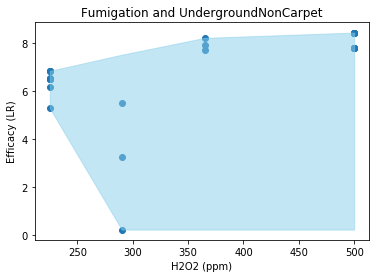

In [18]:
print(min(cd12.H2O2.count(), cd12.Eff.count()))

x_data = cd12.H2O2
y_data = cd12.Eff

plt.scatter(x_data, y_data)
plt.xlabel('H2O2 (ppm)')
plt.ylabel('Efficacy (LR)')
plt.title('Fumigation and UndergroundNonCarpet')

x = [225, 290, 365, 500]
y1 = [6.83, 7.5, 8.2, 8.42]
y2 = [5.28, 0.235690235690235, 0.235690235690235, 0.235690235690235]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [165]:
line1=[(225, 6.83),(365, 8.2)]
line2=[(365, 8.2),(500, 8.42)]

line3=[(225, 5.28),(290, 0.235690235690235)]
line4=[(290, 0.235690235690235),(500, 0.235690235690235)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))

line 1: y = 0.0098x + 4.6282
4.628214285714286
line 2: y = 0.0016x + 7.6052
7.605185185185183
line 3: y = -0.0776x + 22.7411
22.741072261072233
line 4: y = 0.2357
0.23569023569023498
line 1: [(225, 6.83), (365, 8.2)]
line 2: [(365, 8.2), (500, 8.42)]
line 3: [(225, 5.28), (290, 0.235690235690235)]
line 4: [(290, 0.235690235690235), (500, 0.235690235690235)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision time

12


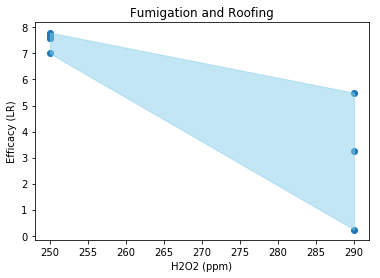

In [19]:
print(min(cd13.H2O2.count(), cd13.Eff.count()))

x_data = cd13.H2O2
y_data = cd13.Eff

plt.scatter(x_data, y_data)
plt.xlabel('H2O2 (ppm)')
plt.ylabel('Efficacy (LR)')
plt.title('Fumigation and Roofing')

x = [250, 290]
y1 = [7.8, 5.49158249158248]
y2 = [7, 0.235690235690235]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [167]:
line1=[(250, 7.8),(290, 5.49158249158248)]
line2=[(250, 7),(290, 0.235690235690235)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = -0.0577x + 22.2276
22.22760942760951
line 2: y = -0.1691x + 49.2769
49.276936026936056
line 1: [(250, 7.8), (290, 5.49158249158248)]
line 2: [(250, 7), (290, 0.235690235690235)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


22


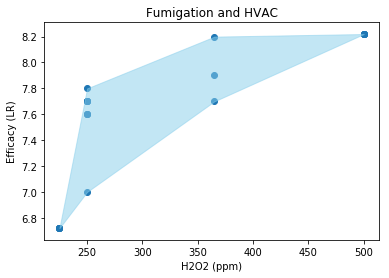

In [20]:
print(min(cd14.H2O2.count(), cd14.Eff.count()))

x_data = cd14.H2O2
y_data = cd14.Eff

plt.scatter(x_data, y_data)
plt.xlabel('H2O2 (ppm)')
plt.ylabel('Efficacy (LR)')
plt.title('Fumigation and HVAC')

x = [225, 250, 365, 500]
y1 = [6.72, 7.8, 8.2, 8.22]
y2 = [6.72, 7, 7.7, 8.22]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [169]:
line1=[(225, 6.72),(250, 7.8)]
line2=[(250, 7.8),(365, 8.2)]
line3=[(365, 8.2),(500, 8.22)]

line4=[(225, 6.72),(250, 7)]
line5=[(250, 7),(365, 7.7)]
line6=[(365, 7.7),(500, 8.22)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line5)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 5: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line6)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 6: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))
print("line 5: {points}".format(points=line5))
print("line 6: {points}".format(points=line6))

line 1: y = 0.0432x + -3.0
-3.0000000000000204
line 2: y = 0.0035x + 6.9304
6.9304347826086925
line 3: y = 0.0001x + 8.1459
8.145925925925921
line 4: y = 0.0112x + 4.2
4.199999999999998
line 5: y = 0.0061x + 5.4783
5.478260869565219
line 6: y = 0.0039x + 6.2941
6.294074074074076
line 1: [(225, 6.72), (250, 7.8)]
line 2: [(250, 7.8), (365, 8.2)]
line 3: [(365, 8.2), (500, 8.22)]
line 4: [(225, 6.72), (250, 7)]
line 5: [(250, 7), (365, 7.7)]
line 6: [(365, 7.7), (500, 8.22)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, 

26


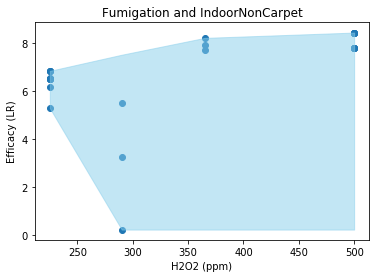

In [21]:
print(min(cd15.H2O2.count(), cd15.Eff.count()))

x_data = cd15.H2O2
y_data = cd15.Eff

plt.scatter(x_data, y_data)
plt.xlabel('H2O2 (ppm)')
plt.ylabel('Efficacy (LR)')
plt.title('Fumigation and IndoorNonCarpet')

x = [225, 290, 365, 500]
y1 = [6.83, 7.5, 8.2, 8.42]
y2 = [5.28, 0.235690235690235, 0.235690235690235, 0.235690235690235]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [171]:
line1=[(225, 6.83),(365, 8.2)]
line2=[(365, 8.2),(500, 8.42)]

line3=[(225, 5.28),(290, 0.235690235690235)]
line4=[(290, 0.235690235690235),(500, 0.235690235690235)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))

line 1: y = 0.0098x + 4.6282
4.628214285714286
line 2: y = 0.0016x + 7.6052
7.605185185185183
line 3: y = -0.0776x + 22.7411
22.741072261072233
line 4: y = 0.2357
0.23569023569023498
line 1: [(225, 6.83), (365, 8.2)]
line 2: [(365, 8.2), (500, 8.42)]
line 3: [(225, 5.28), (290, 0.235690235690235)]
line 4: [(290, 0.235690235690235), (500, 0.235690235690235)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision time

52


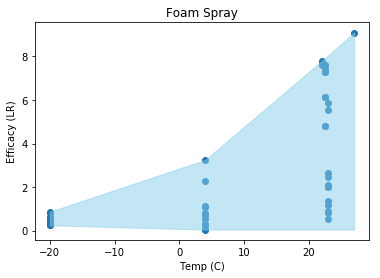

In [38]:
x_data = cd18.Temp
y_data = cd18.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray')

x = [-20, 4, 22, 27]
y1 = [0.869565217391303, 3.25217391304347, 7.8, 9.1]
y2 = [0.243702414859307, 0.0468564715791338, 0.0468564715791338, 0.0468564715791338]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [173]:
line1=[(-20, 0.869565217391303),(4, 3.25217391304347)]
line2=[(4, 3.25217391304347),(22, 7.8)]
line3=[(22, 7.8),(27, 9.1)]

line4=[(-20, 0.243702414859307),(4, 0.0468564715791338)]
line5=[(4, 0.0468564715791338),(27, 0.0468564715791338)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line5)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 5: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))
print("line 5: {points}".format(points=line5))

line 1: y = 0.0993x + 2.8551
2.8550724637681086
line 2: y = 0.2527x + 2.2415
2.2415458937198
line 3: y = 0.26x + 2.08
2.0799999999999863
line 4: y = -0.0082x + 0.0797
0.079664128792496
line 5: y = 0.0469
0.0468564715791338
line 1: [(-20, 0.869565217391303), (4, 3.25217391304347)]
line 2: [(4, 3.25217391304347), (22, 7.8)]
line 3: [(22, 7.8), (27, 9.1)]
line 4: [(-20, 0.243702414859307), (4, 0.0468564715791338)]
line 5: [(4, 0.0468564715791338), (27, 0.0468564715791338)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine p

1402


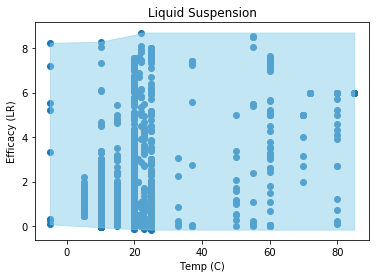

In [110]:
x_data = cd19.Temp
y_data = cd19.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Suspension')

x = [-5, 10, 20, 22, 25, 85]
y1 = [8.23460410557184, 8.2873900293255, 8.6, 8.69999999999999, 8.69999999999999, 8.69999999999999]
y2 = [0.0791788856304986, -0.0556122692362731, -0.14, -0.14, -0.160958904109588, -0.160958904109588]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [176]:
line1=[(-5, 8.23460410557184),(10, 8.2873900293255)]
line2=[(10, 8.2873900293255),(22, 8.69999999999999)]
line3=[(22, 8.69999999999999),(85, 8.69999999999999)]

line4=[(-5, 0.0791788856304986),(10, -0.0556122692362731)]
line5=[(10, -0.0556122692362731),(20, -0.14)]
line6=[(20, -0.14),(25, -0.160958904109588)]
line7=[(25, -0.160958904109588),(85, -0.160958904109588)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line5)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 5: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line6)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 6: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line7)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 7: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))
print("line 5: {points}".format(points=line5))
print("line 6: {points}".format(points=line6))
print("line 7: {points}".format(points=line7))

line 1: y = 0.0035x + 8.2522
8.252199413489725
line 2: y = 0.0344x + 7.9435
7.943548387096763
line 3: y = 8.7
8.699999999999987
line 4: y = -0.009x + 0.0342
0.03424850067490804
line 5: y = -0.0084x + 0.0288
0.028775461527453788
line 6: y = -0.0042x + -0.0562
-0.05616438356164787
line 7: y = -0.161
-0.16095890410958802
line 1: [(-5, 8.23460410557184), (10, 8.2873900293255)]
line 2: [(10, 8.2873900293255), (22, 8.69999999999999)]
line 3: [(22, 8.69999999999999), (85, 8.69999999999999)]
line 4: [(-5, 0.0791788856304986), (10, -0.0556122692362731)]
line 5: [(10, -0.0556122692362731), (20, -0.14)]
line 6: [(20, -0.14), (25, -0.160958904109588)]
line 7: [(25, -0.160958904109588), (85, -0.160958904109588)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input m

49


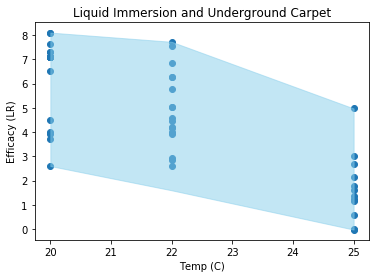

In [25]:
x_data = cd20.Temp
y_data = cd20.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and Underground Carpet')

x = [20, 22, 25]
y1 = [8.1, 7.72, 4.9734939759036]
y2 = [2.6, 1.6, -0.0192771084337346]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [178]:
line1=[(20, 8.1),(22, 7.72)]
line2=[(22, 7.72),(25, 4.9734939759036)]

line3=[(20, 2.6),(25, -0.0192771084337346)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = -0.19x + 11.9
11.899999999999999
line 2: y = -0.9155x + 27.861
27.861044176706905
line 3: y = -0.5239x + 13.0771
13.077108433734942
line 1: [(20, 8.1), (22, 7.72)]
line 2: [(22, 7.72), (25, 4.9734939759036)]
line 3: [(20, 2.6), (25, -0.0192771084337346)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

5


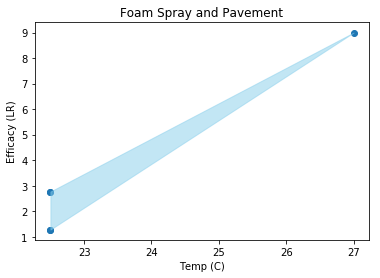

In [26]:
x_data = cd21.Temp
y_data = cd21.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and Pavement')

x = [22.5, 27]
y1 = [2.77, 9]
y2 = [1.28, 9]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [180]:
line1=[(22.5, 2.77),(27, 9)]
line2=[(22.5, 1.28),(27, 9)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = 1.3844x + -28.38
-28.37999999999998
line 2: y = 1.7156x + -37.32
-37.319999999999965
line 1: [(22.5, 2.77), (27, 9)]
line 2: [(22.5, 1.28), (27, 9)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


5


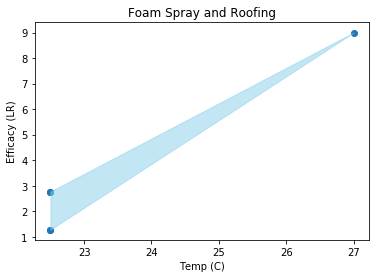

In [27]:
x_data = cd22.Temp
y_data = cd22.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and Roofing')

x = [22.5, 27]
y1 = [2.77, 9]
y2 = [1.28, 9]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [182]:
line1=[(22.5, 2.77),(27, 9)]
line2=[(22.5, 1.28),(27, 9)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = 1.3844x + -28.38
-28.37999999999998
line 2: y = 1.7156x + -37.32
-37.319999999999965
line 1: [(22.5, 2.77), (27, 9)]
line 2: [(22.5, 1.28), (27, 9)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


5


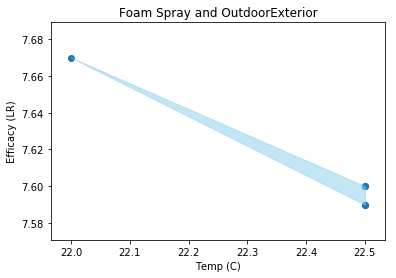

In [28]:
x_data = cd23.Temp
y_data = cd23.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and OutdoorExterior')

x = [22, 22.5]
y1 = [7.67, 7.6]
y2 = [7.67, 7.59]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [184]:
line1=[(22, 7.67),(22.5, 7.6)]
line2=[(22, 7.67),(22.5, 7.59)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))

line 1: y = -0.14x + 10.75
10.750000000000089
line 2: y = -0.16x + 11.19
11.190000000000092
line 1: [(22, 7.67), (22.5, 7.6)]
line 2: [(22, 7.67), (22.5, 7.59)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


11


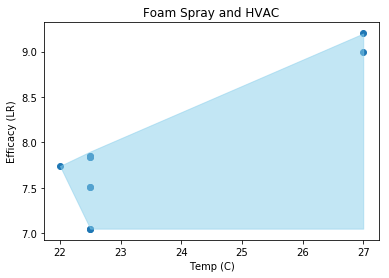

In [117]:
x_data = cd24.Temp
y_data = cd24.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and HVAC')

x = [22, 22.5, 27]
y1 = [7.74, 7.9, 9.19999999999999]
y2 = [7.74, 7.05, 7.05]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [186]:
line1=[(22, 7.74),(27, 9.19999999999999)]

line2=[(22, 7.47),(22.5, 7.05)]
line3=[(22.5, 7.05),(27, 7.05)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 0.292x + 1.316
1.3160000000000291
line 2: y = -0.84x + 25.95
25.950000000000166
line 3: y = 7.05
7.050000000000005
line 1: [(22, 7.74), (27, 9.19999999999999)]
line 2: [(22, 7.47), (22.5, 7.05)]
line 3: [(22.5, 7.05), (27, 7.05)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

49


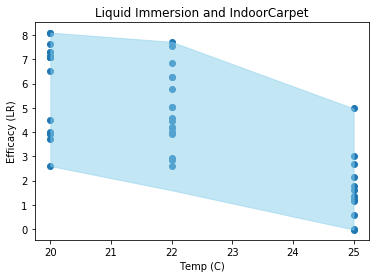

In [30]:
x_data = cd25.Temp
y_data = cd25.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and IndoorCarpet')

x = [20, 22, 25]
y1 = [8.1, 7.72, 4.9734939759036]
y2 = [2.6, 1.6, -0.0192771084337346]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [188]:
line1=[(20, 8.1),(22, 7.72)]
line2=[(22, 7.72),(25, 4.9734939759036)]

line3=[(20, 2.6),(25, -0.0192771084337346)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = -0.19x + 11.9
11.899999999999999
line 2: y = -0.9155x + 27.861
27.861044176706905
line 3: y = -0.5239x + 13.0771
13.077108433734942
line 1: [(20, 8.1), (22, 7.72)]
line 2: [(22, 7.72), (25, 4.9734939759036)]
line 3: [(20, 2.6), (25, -0.0192771084337346)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

11


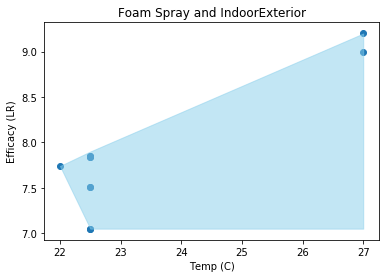

In [131]:
x_data = cd26.Temp
y_data = cd26.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('Temp (C)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and IndoorExterior')

x = [22, 22.5, 27]
y1 = [7.74, 7.9, 9.19999999999999]
y2 = [7.74, 7.05, 7.05]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [192]:
line1=[(22, 7.74),(27, 9.19999999999999)]

line2=[(22, 7.47),(22.5, 7.05)]
line3=[(22.5, 7.05),(27, 7.05)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(m)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 0.292x + 1.316
1.3160000000000291
line 2: y = -0.84x + 25.95
25.950000000000166
line 3: y = 7.05
-2.0216816654601638e-16
line 1: [(22, 7.74), (27, 9.19999999999999)]
line 2: [(22, 7.47), (22.5, 7.05)]
line 3: [(22.5, 7.05), (27, 7.05)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

11


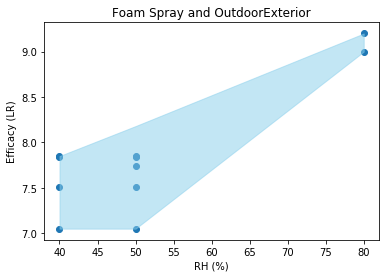

In [32]:
x_data = cd27.RH
y_data = cd27.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('RH (%)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and OutdoorExterior')

x = [40, 50, 80]
y1 = [7.85, 8.18, 9.19999999999999]
y2 = [7.05, 7.05, 9]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [193]:
line1=[(40, 7.85),(80, 9.19999999999999)]

line2=[(40, 7.05),(50, 7.05)]
line3=[(50, 7.05),(80, 9)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 0.0337x + 6.5
6.500000000000011
line 2: y = 7.05
7.049999999999998
line 3: y = 0.065x + 3.8
3.8000000000000056
line 1: [(40, 7.85), (80, 9.19999999999999)]
line 2: [(40, 7.05), (50, 7.05)]
line 3: [(50, 7.05), (80, 9)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

11


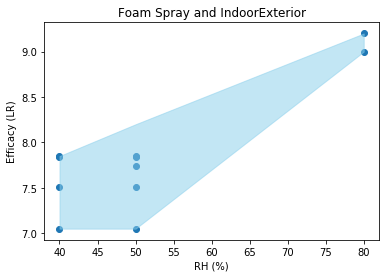

In [33]:
x_data = cd28.RH
y_data = cd28.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('RH (%)')
plt.ylabel('Efficacy (LR)')
plt.title('Foam Spray and IndoorExterior')

x = [40, 50, 80]
y1 = [7.85, 8.2, 9.19999999999999]
y2 = [7.05, 7.05, 9]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [134]:
line1=[(40, 7.85),(80, 9.19999999999999)]

line2=[(40, 7.05),(50, 7.05)]
line3=[(50, 7.05),(80, 9)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {c}".format(m=round(m, 4),c=round(c, 4)))

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 0.0337x + 6.5
line 2: y = 7.05
line 3: y = 0.065x + 3.8
line 1: [(40, 7.85), (80, 9.19999999999999)]
line 2: [(40, 7.05), (50, 7.05)]
line 3: [(50, 7.05), (80, 9)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matri

26


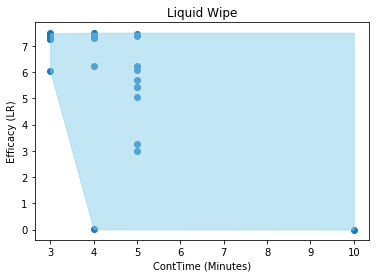

In [34]:
x_data = cd29.ContTime
y_data = cd29.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('ContTime (Minutes)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Wipe')

x = [3, 4, 10]
y1 = [7.47, 7.5, 7.5]
y2 = [6.05, 0.01, 0]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [195]:
line1=[(3, 7.47),(4, 7.5)]
line2=[(4, 7.5),(10, 7.5)]

line3=[(3, 6.05),(4, 0.01)]
line4=[(4, 0.01),(10, 0)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))

line 1: y = 0.03x + 7.38
7.3799999999999875
line 2: y = 7.5
7.499999999999994
line 3: y = -6.04x + 24.17
24.169999999999984
line 4: y = -0.0017x + 0.0167
0.01666666666666666
line 1: [(3, 7.47), (4, 7.5)]
line 2: [(4, 7.5), (10, 7.5)]
line 3: [(3, 6.05), (4, 0.01)]
line 4: [(4, 0.01), (10, 0)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision time

58


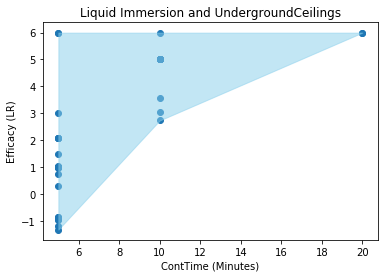

In [35]:
x_data = cd30.ContTime
y_data = cd30.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('ContTime (Minutes)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and UndergroundCeilings')

x = [5, 10, 20]
y1 = [6, 6, 6]
y2 = [-1.33, 2.73, 6]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [197]:
line1=[(5, 6),(20, 6)]

line2=[(5, -1.33),(10, 2.73)]
line3=[(10, 2.73),(20, 6)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 6.0
6.000000000000002
line 2: y = 0.812x + -5.39
-5.39
line 3: y = 0.327x + -0.54
-0.5399999999999969
line 1: [(5, 6), (20, 6)]
line 2: [(5, -1.33), (10, 2.73)]
line 3: [(10, 2.73), (20, 6)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
T

17


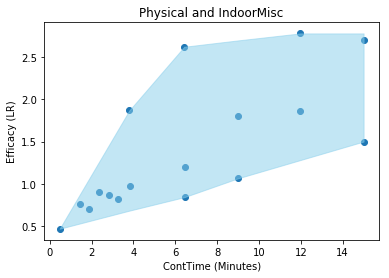

In [139]:
x_data = cd31.ContTime
y_data = cd31.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('ContTime (Minutes)')
plt.ylabel('Efficacy (LR)')
plt.title('Physical and IndoorMisc')

x = [0.472486987897945, 3.80605410571161, 6.43057000077546, 6.46307174560598, 8.98929837285999, 11.9741844913077, 15]
y1 = [0.465034965034966, 1.87062937062937, 2.62587412587412, 2.62587412587412, 2.7, 2.78321678321677, 2.78321678321677]
y2 = [0.465034965034966, 0.68, 0.84, 0.842657342657343, 1.06293706293706, 1.28, 1.5]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [199]:
line1=[(0.472486987897945, 0.465034965034966),(3.80605410571161, 1.87062937062937)]
line2=[(3.80605410571161, 1.87062937062937),(6.43057000077546, 2.62587412587412)]
line3=[(6.43057000077546, 2.62587412587412),(11.9741844913077, 2.78321678321677)]
line4=[(11.9741844913077, 2.78321678321677),(15, 2.78321678321677)]

line5=[(0.472486987897945, 0.465034965034966),(6.46307174560598, 0.842657342657343)]
line6=[(6.46307174560598, 0.842657342657343),(8.98929837285999, 1.06293706293706)]
line7=[(8.98929837285999, 1.06293706293706),(15, 1.5)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line4)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 4: y = {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line5)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 5: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line6)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 6: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

x_coords, y_coords = zip(*line7)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 7: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))
print(c)

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))
print("line 4: {points}".format(points=line4))
print("line 5: {points}".format(points=line5))
print("line 6: {points}".format(points=line6))
print("line 7: {points}".format(points=line7))

line 1: y = 0.4216x + 0.2658
0.26581141757536936
line 2: y = 0.2878x + 0.7754
0.7753788496008022
line 3: y = 0.0284x + 2.4434
2.4433572907157664
line 4: y = 2.7832
2.783216783216767
line 5: y = 0.063x + 0.4353
0.4352512849800127
line 6: y = 0.0872x + 0.2791
0.27909601331716427
line 7: y = 0.0727x + 0.4093
0.4092880560994469
line 1: [(0.472486987897945, 0.465034965034966), (3.80605410571161, 1.87062937062937)]
line 2: [(3.80605410571161, 1.87062937062937), (6.43057000077546, 2.62587412587412)]
line 3: [(6.43057000077546, 2.62587412587412), (11.9741844913077, 2.78321678321677)]
line 4: [(11.9741844913077, 2.78321678321677), (15, 2.78321678321677)]
line 5: [(0.472486987897945, 0.465034965034966), (6.46307174560598, 0.842657342657343)]
line 6: [(6.46307174560598, 0.842657342657343), (8.98929837285999, 1.06293706293706)]
line 7: [(8.98929837285999, 1.06293706293706), (15, 1.5)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input m

58


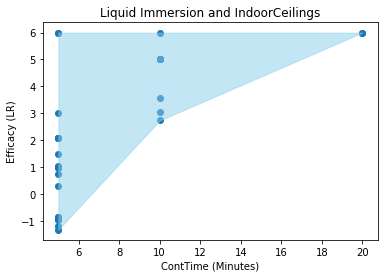

In [37]:
x_data = cd32.ContTime
y_data = cd32.Eff

print(min(len(x_data), len(y_data)))

plt.scatter(x_data, y_data)
plt.xlabel('ContTime (Minutes)')
plt.ylabel('Efficacy (LR)')
plt.title('Liquid Immersion and IndoorCeilings')

x = [5, 10, 20]
y1 = [6, 6, 6]
y2 = [-1.33, 2.73, 6]

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5) 
    
plt.show()

In [136]:
line1=[(5, 6),(20, 6)]

line2=[(5, -1.33),(10, 2.73)]
line3=[(10, 2.73),(20, 6)]

x_coords, y_coords = zip(*line1)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 1: y = {c}".format(m=round(m, 4),c=round(c, 4)))

x_coords, y_coords = zip(*line2)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 2: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))

x_coords, y_coords = zip(*line3)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("line 3: y = {m}x + {c}".format(m=round(m, 4),c=round(c, 4)))

print("line 1: {points}".format(points=line1))
print("line 2: {points}".format(points=line2))
print("line 3: {points}".format(points=line3))

line 1: y = 6.0
line 2: y = 0.812x + -5.39
line 3: y = 0.327x + -0.54
line 1: [(5, 6), (20, 6)]
line 2: [(5, -1.33), (10, 2.73)]
line 3: [(10, 2.73), (20, 6)]


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matri